In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.paths import project_dir
from src.datasets.volumetric_datasets import VolumeDatasetInMemory, PatchVolumeDatasetInMemory
from src.preprocessing.main_create_v6_phi_hit_dataset import interface_type_generator
from src.interface_representation.interface_types import InterfaceType
from src.plotting_utils import show_isosurface_plot_from_arr

logging.basicConfig(level=logging.INFO)

In [2]:
base_dir = Path('./../../src/preprocessing')

In [3]:

interface_types = [
        InterfaceType.SIGNED_DISTANCE_EXACT,
        InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
        InterfaceType.HEAVISIDE,
        InterfaceType.TANH_EPSILON,
    ]

epsilons = [1/128, 1/64, 1/32, 1/16]

def visualise_dataset_sample(arr):
    arr = arr.squeeze()

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()


def visualise_grad_magnitude(arr):
    dx = 1 / 256
    arr = arr.squeeze()
    grad = np.gradient(arr, dx)
    grad_magnitude = np.sqrt(np.sum(np.square(grad), axis=0))

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(grad_magnitude[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(grad_magnitude[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(grad_magnitude[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()
    
def visualise_surface(arr, interface_type):
    if interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        level = 0.0
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        level = 0.0
    else:
        level = 0.5

    show_isosurface_plot_from_arr(arr.squeeze().numpy(), level=level, N=256, verbose=False)
    
def visualise_volume_fractions(dataset, interface_type):
    if not interface_type == InterfaceType.HEAVISIDE:
        return

    vol_fracs = []

    for i in range(len(dataset)):
        vol_fracs.append(np.sum(dataset[i].squeeze().numpy()) / dataset[i].numel())

    plt.hist(vol_fracs, bins=20)

def dataset_exploration(dataset, interface_type, epsilon):
    print(interface_type)
    ind = 0
    arr = dataset[ind]
    
    visualise_dataset_sample(arr)
    visualise_grad_magnitude(arr)
    visualise_surface(arr, interface_type)
    visualise_volume_fractions(dataset, interface_type)
    


INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/SIGNED_DISTANCE_EXACT/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.SIGNED_DISTANCE_EXACT


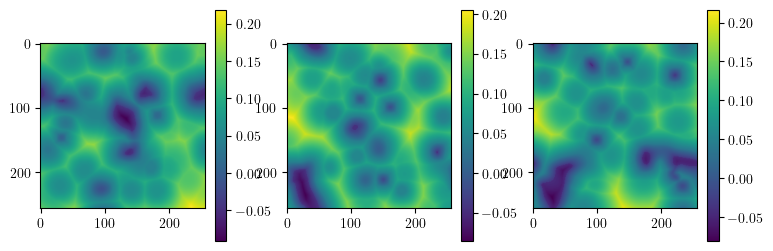

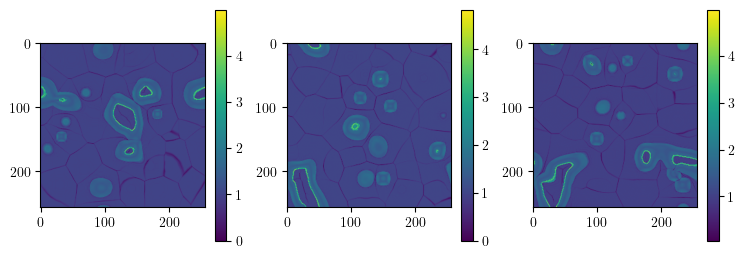

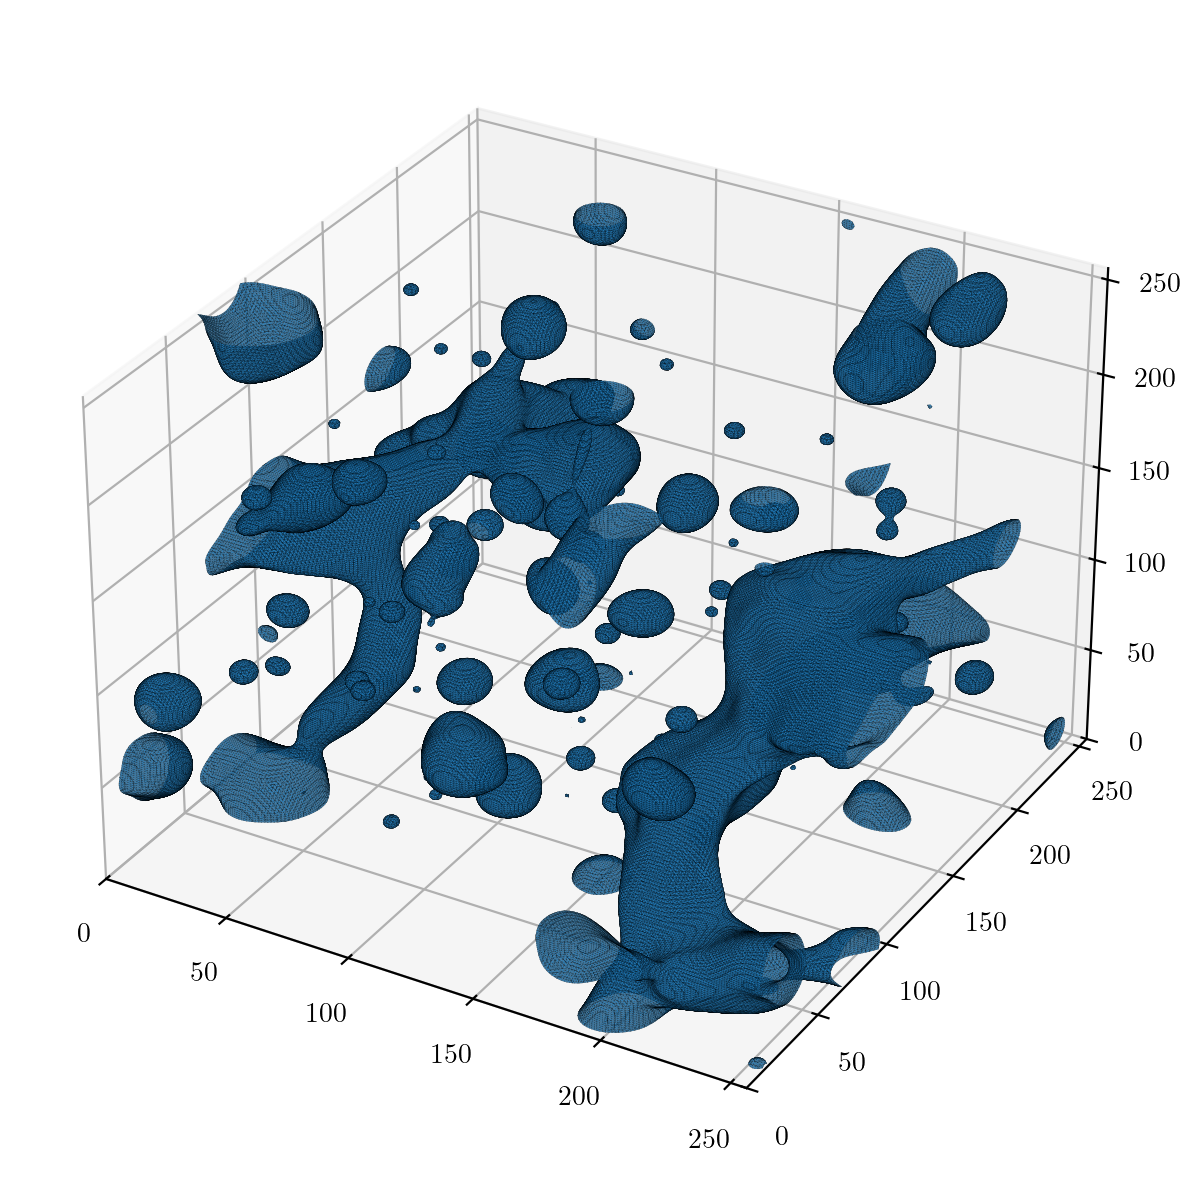

INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/SIGNED_DISTANCE_APPROXIMATE/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.SIGNED_DISTANCE_APPROXIMATE


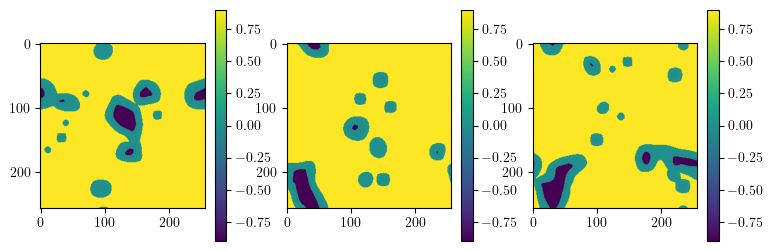

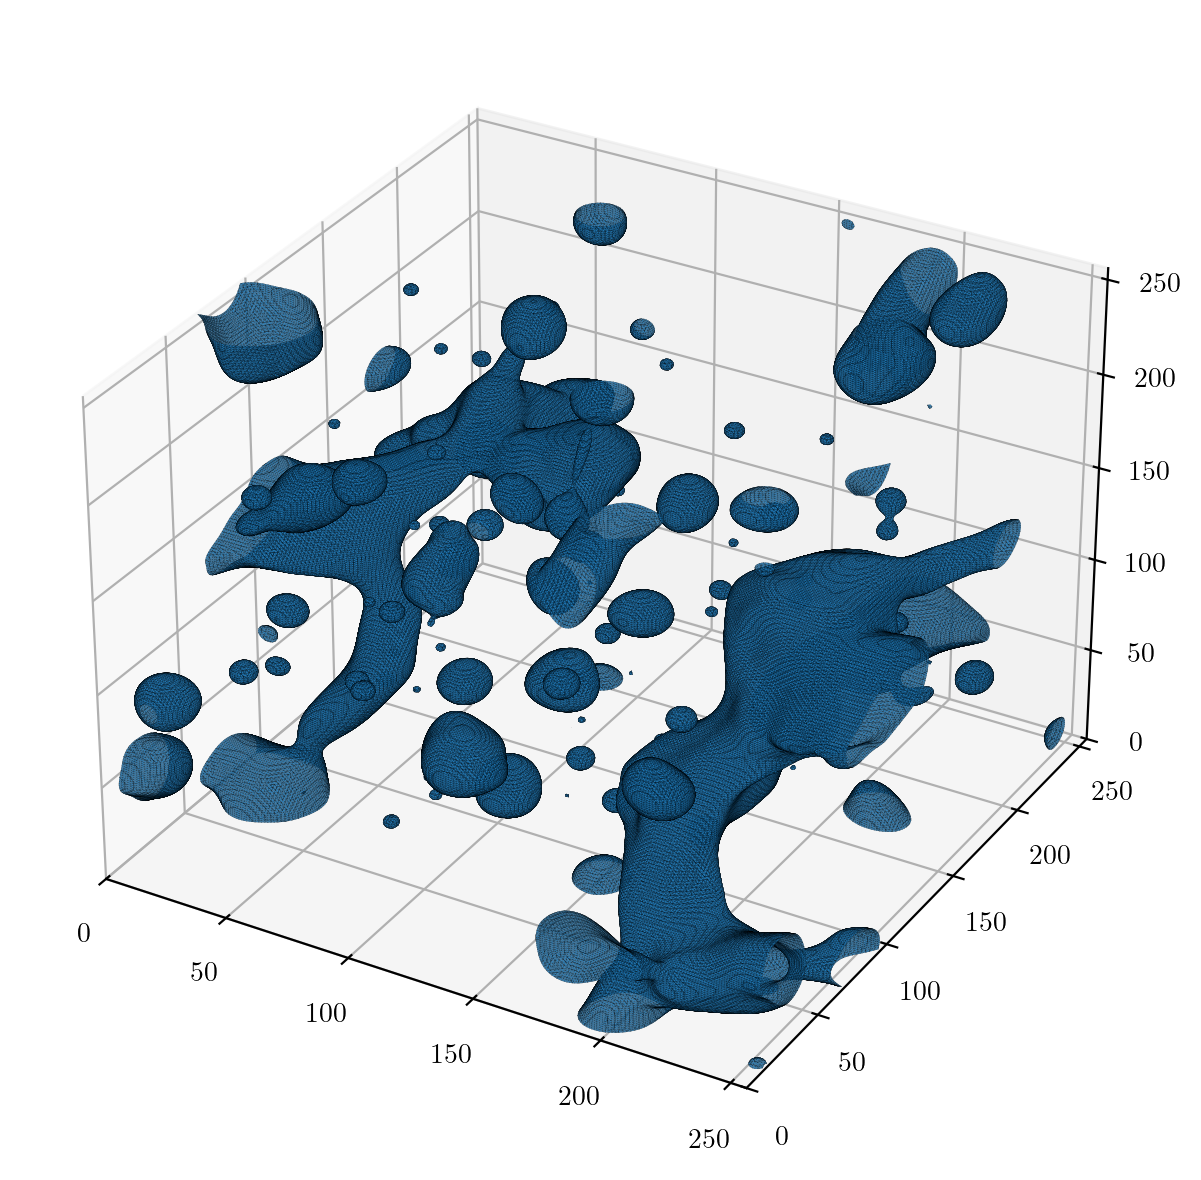

INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/HEAVISIDE/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.HEAVISIDE


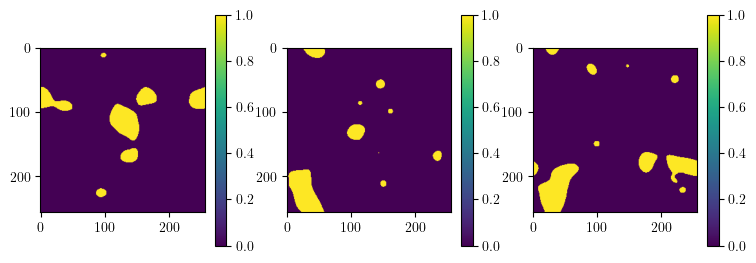

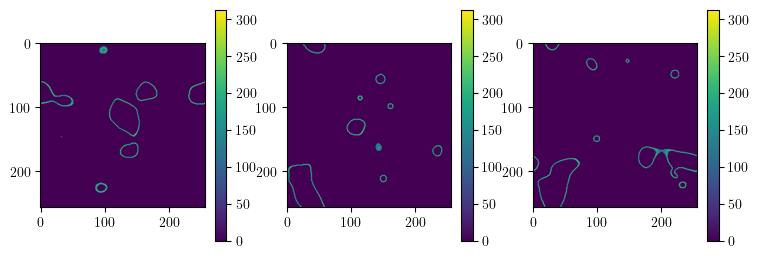

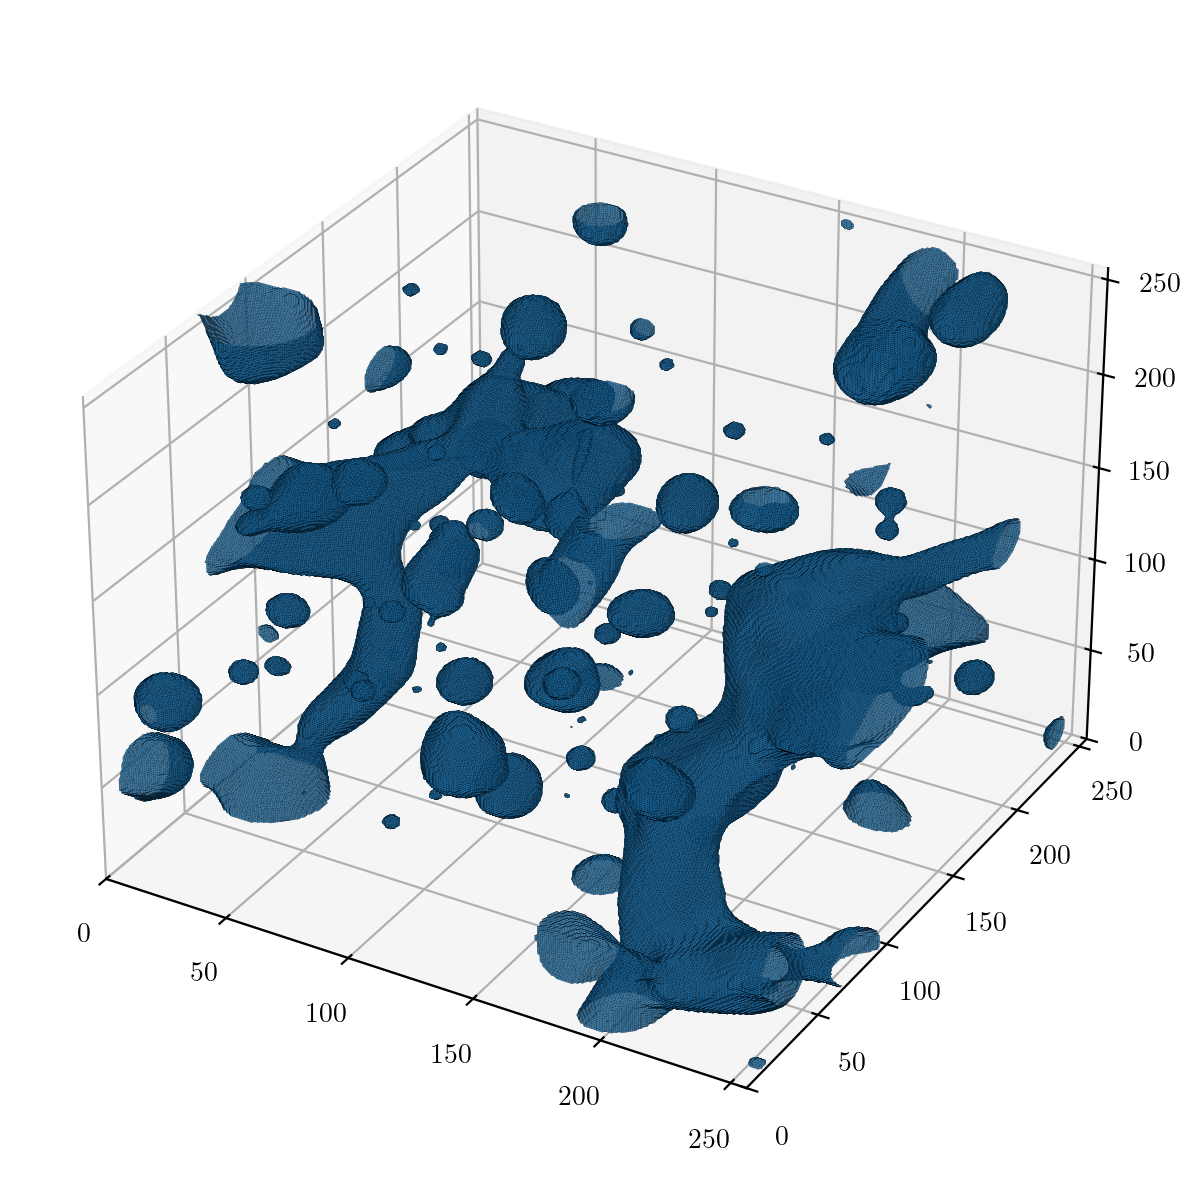

INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/TANH_EPSILON0.0078125/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.TANH_EPSILON


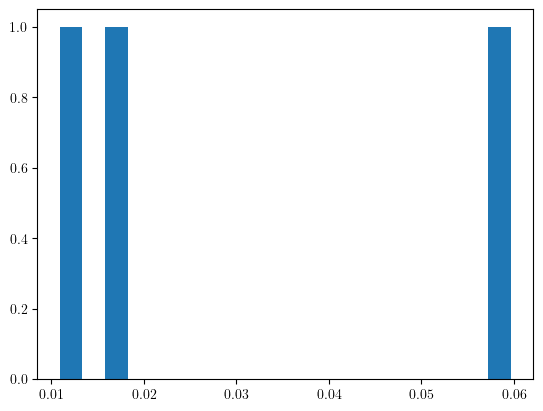

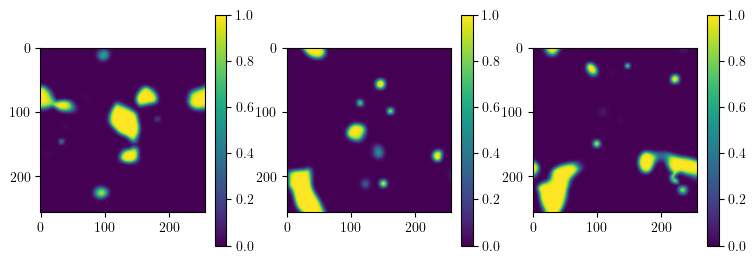

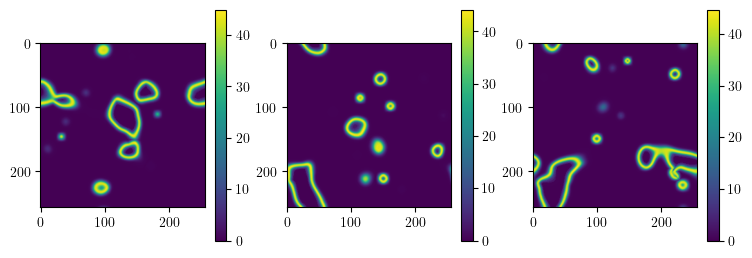

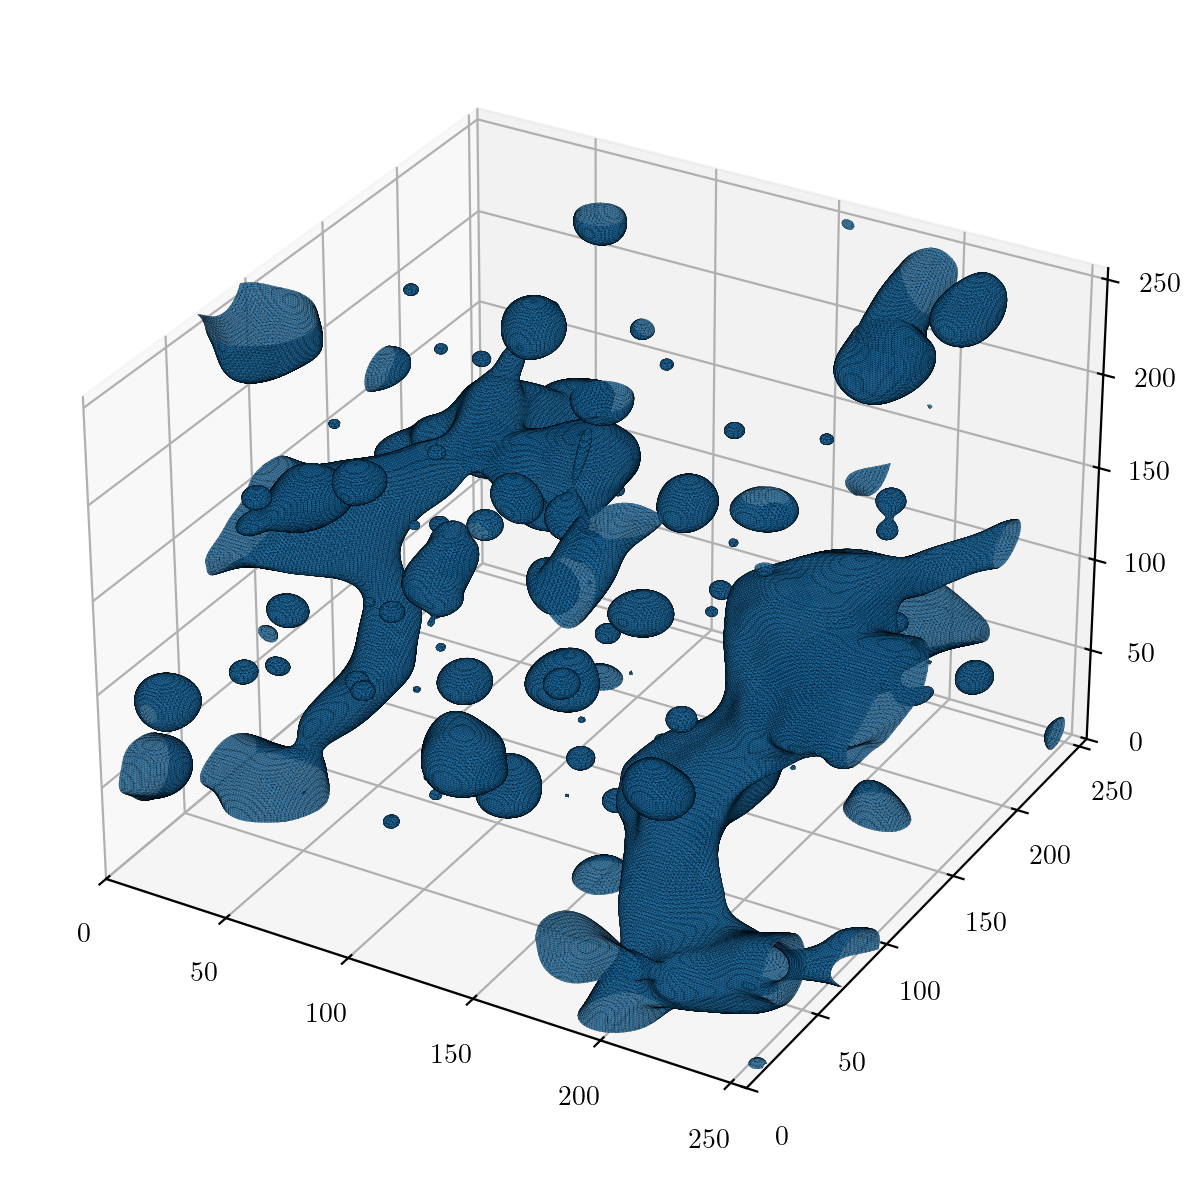

INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/TANH_EPSILON0.015625/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.TANH_EPSILON


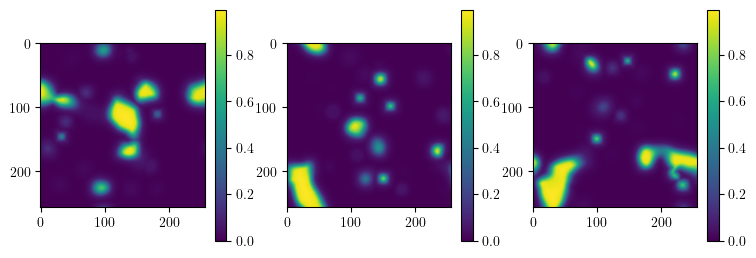

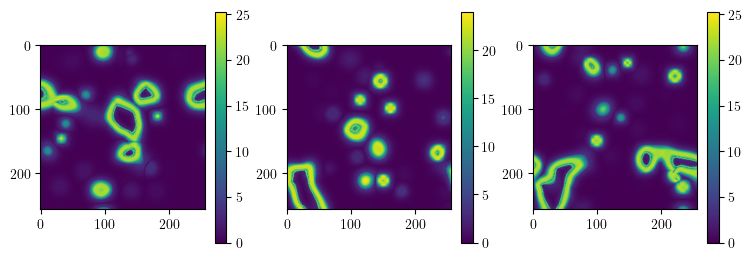

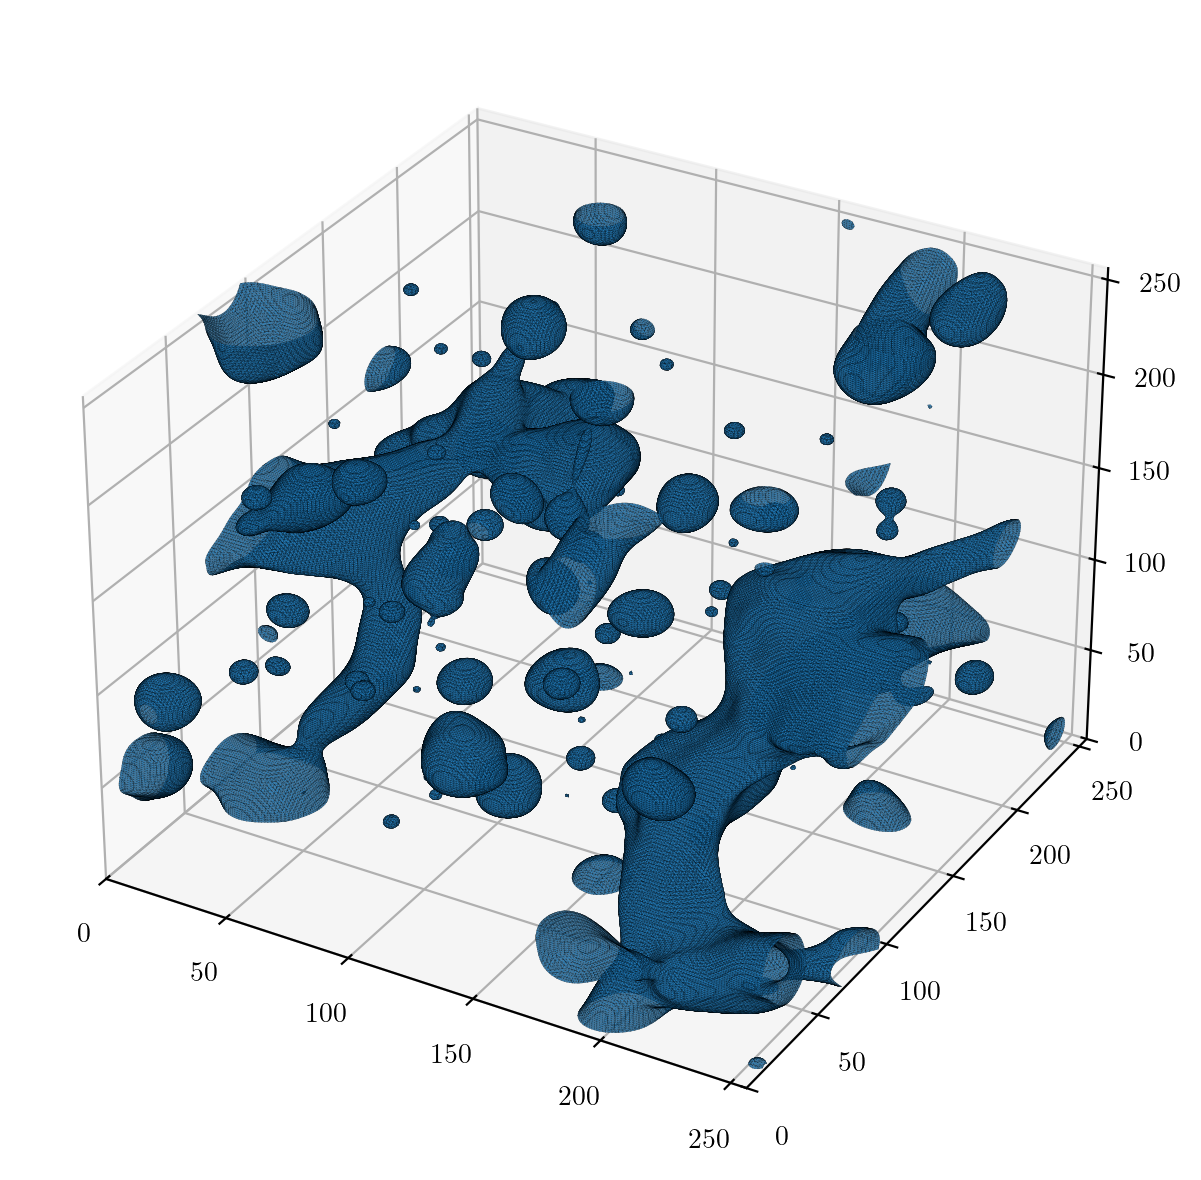

INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/TANH_EPSILON0.03125/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.TANH_EPSILON


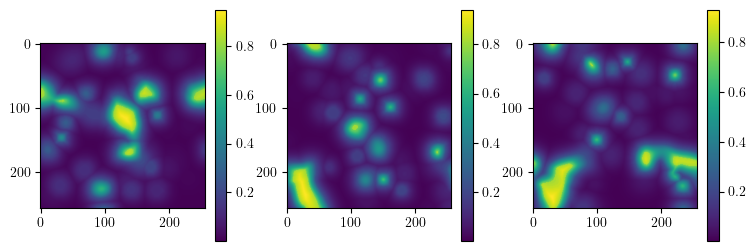

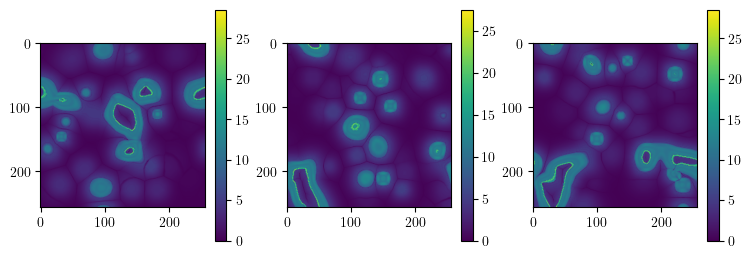

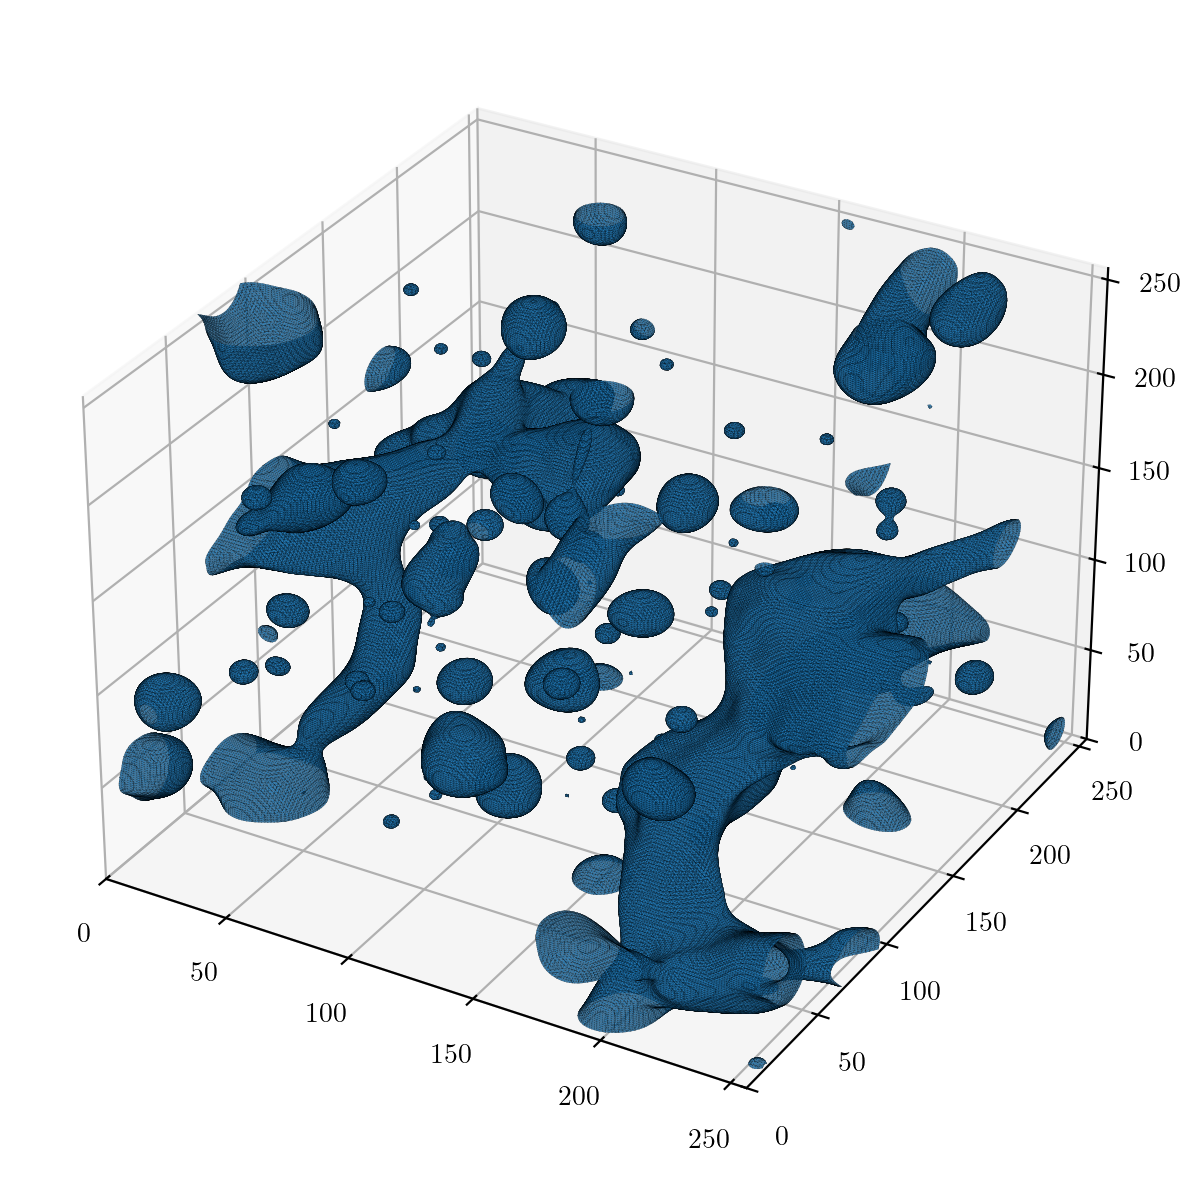

INFO:src.datasets.volumetric_datasets:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.volumetric_datasets:Loaded 3 files for split val
INFO:src.datasets.volumetric_datasets:First file: ../../src/preprocessing/data/v6_hit_experiment/TANH_EPSILON0.0625/2023-05-12-09-22-Folder_932_Restart_006_1.67086.npz
INFO:src.datasets.volumetric_datasets:Generated 3 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 256, 256, 256])


InterfaceType.TANH_EPSILON


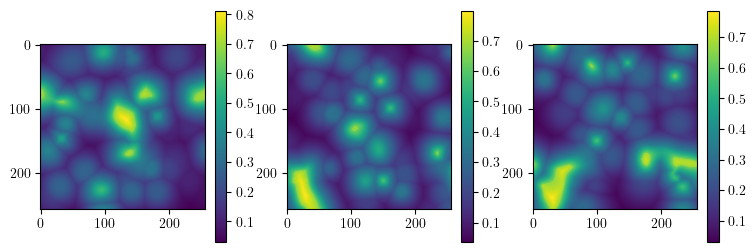

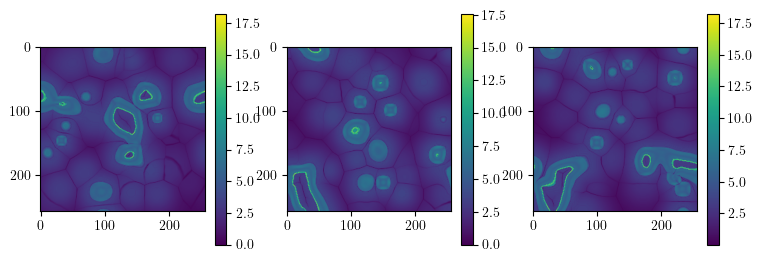

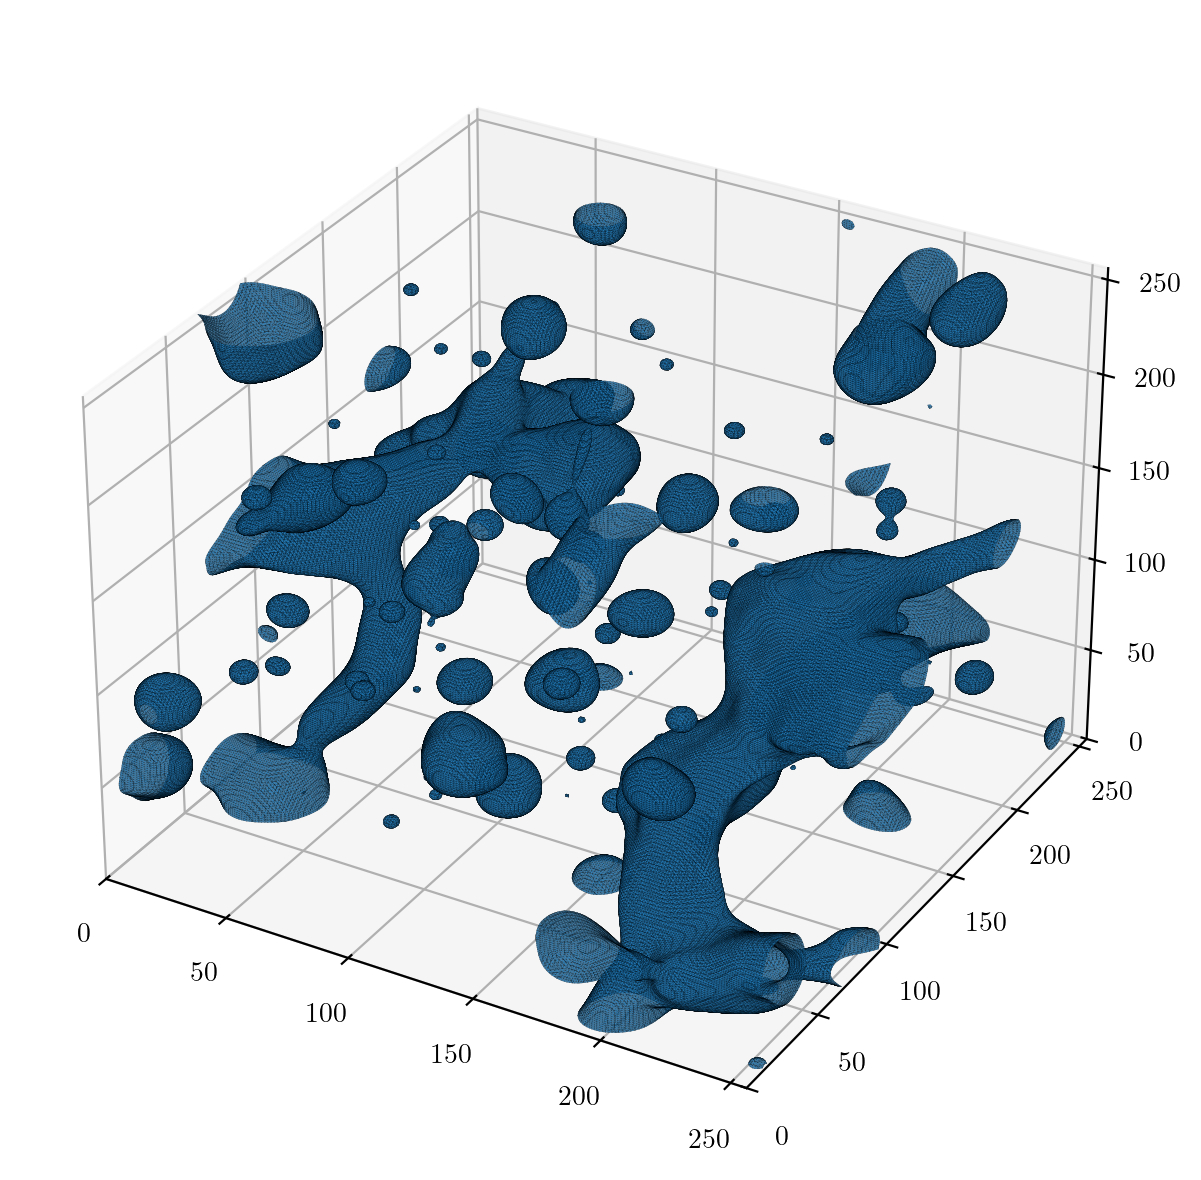

In [4]:

for interface_type, epsilon, outdir in interface_type_generator(interface_types, epsilons):
    dataset = VolumeDatasetInMemory(data_dir=base_dir / outdir, split='val', debug=True, data_key='phi', metadata_keys=None)
    dataset_exploration(dataset, interface_type, epsilon)
